In [95]:
# https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
import pandas as pd

In [96]:
books = pd.read_csv('books10k.csv')
books = books.drop(['image_url', 'small_image_url', 'title', 
                          'best_book_id'], axis = 1)
ratings = pd.read_csv('ratings10k.csv')

print(books.shape)
print(ratings.shape)

(10000, 19)
(230595, 3)


In [97]:
books.head()

,book_id,goodreads_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [98]:
ratings.head()

,user_id,book_id,rating
0,1,258,5.0
1,2,4081,4.0
2,2,260,5.0
3,2,9296,5.0
4,2,2318,3.0


In [99]:
ratings['rating'].isnull().sum()

1

In [100]:
ratings = ratings.dropna()
ratings['rating'].isnull().sum()

0

In [101]:
df = pd.merge(books, ratings, on='book_id', how='inner')
df.head()

,book_id,goodreads_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,language_code,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating
0,1,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,eng,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,2886,5.0
1,2,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,4,5.0
2,2,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,15,4.0
3,2,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,32,4.0
4,2,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,29,5.0


In [102]:
df.drop(['goodreads_book_id'], axis=1, inplace=True)

In [103]:
df.shape

(230594, 20)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230594 entries, 0 to 230593
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   book_id                    230594 non-null  int64  
 1   work_id                    230594 non-null  int64  
 2   books_count                230594 non-null  int64  
 3   isbn                       227676 non-null  object 
 4   isbn13                     228193 non-null  float64
 5   authors                    230594 non-null  object 
 6   original_publication_year  230553 non-null  float64
 7   original_title             228020 non-null  object 
 8   language_code              215170 non-null  object 
 9   average_rating             230594 non-null  float64
 10  ratings_count              230594 non-null  int64  
 11  work_ratings_count         230594 non-null  int64  
 12  work_text_reviews_count    230594 non-null  int64  
 13  ratings_1                  23

In [105]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = df['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} book-ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [106]:
# Number of ratings per book
data = df.groupby('book_id')['rating'].count().clip(upper=100)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 100,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Book (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Book'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [107]:
df.groupby('book_id')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

,book_id,rating
20,26,1407
3,4,1285
1,2,1257
13,18,1211
17,23,1193
6,8,1179
18,24,1172
19,25,1169
4,5,1167
15,21,1157


In [108]:
# Number of ratings per user
data = df.groupby('user_id')['rating'].count().clip(upper=100)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 100,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User (Clipped at 50)',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [109]:
df.groupby('user_id')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

,user_id,rating
3511,5272,186
3609,5436,185
1567,2276,185
3126,4606,184
2817,4147,179
1012,1456,175
1250,1794,172
1719,2501,172
945,1350,171
1173,1677,169


In [68]:
min_book_ratings = 5
filter_books = df['book_id'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 5
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['book_id'].isin(filter_books)) & (df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(230594, 20)
The new data frame shape:	(225634, 20)


In [69]:
# trimmed df (50 = RS for most popular books, 5 = RS for backlist books)

In [70]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df_new[['user_id', 'book_id', 'rating']], reader)

In [71]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [72]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [93]:
print("+++ Algorithm results for full data +++") 
surprise_results # lowest = KNNBaseline in trial 1, SVDpp in trial 2

+++ Algorithm results for full data +++


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.879525,108.373439,5.659066
KNNBaseline,0.881577,2.209882,16.040518
BaselineOnly,0.885449,0.565377,0.678502
SVD,0.889619,8.966854,0.760974
KNNWithMeans,0.889943,1.729749,14.472341
KNNWithZScore,0.890439,1.932559,15.332665
SlopeOne,0.899821,1.317991,4.535259
CoClustering,0.917486,3.842257,0.742143
KNNBasic,0.924648,1.655176,14.064332


In [77]:
# for SVDpp algo
# https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp
print('Using ALS')

algo = SVDpp()
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS


{'test_rmse': array([0.87904017, 0.87887971, 0.88197913]),
 'fit_time': (100.94599199295044, 98.81686186790466, 97.58483719825745),
 'test_time': (5.43478798866272, 5.517756938934326, 5.305819988250732)}

In [78]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVDpp()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.8762


0.8761947025736043

In [79]:
trainset = algo.trainset
print(algo.__class__.__name__)

SVDpp


In [80]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [81]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,1554,171,4.0,3.775987,{'was_impossible': False},97,270,0.224013
1,1036,58,5.0,3.669841,{'was_impossible': False},40,636,1.330159
2,1264,4728,5.0,3.753068,{'was_impossible': False},30,19,1.246932
3,2028,136,5.0,3.765029,{'was_impossible': False},39,212,1.234971
4,1115,3071,4.0,3.135571,{'was_impossible': False},86,17,0.864429


In [82]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [83]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
16024,2202,24,4.0,3.999979,{'was_impossible': False},26,882,0.000021
1352,1254,317,4.0,3.999976,{'was_impossible': False},56,125,0.000024
39813,324,3137,4.0,4.000028,{'was_impossible': False},92,15,0.000028
7548,5499,62,4.0,4.000044,{'was_impossible': False},68,262,0.000044
35246,1590,1250,4.0,3.999946,{'was_impossible': False},91,87,0.000054
19556,2483,1117,3.0,2.999941,{'was_impossible': False},54,109,0.000059
23899,5651,1885,4.0,3.999938,{'was_impossible': False},81,39,0.000062
41504,4057,508,4.0,4.000082,{'was_impossible': False},48,133,0.000082
15466,4849,27,5.0,5.000114,{'was_impossible': False},48,869,0.000114
36379,1118,1464,4.0,3.999879,{'was_impossible': False},17,20,0.000121


In [84]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
21205,2029,5,1.0,4.610982,{'was_impossible': False},101,870,3.610982
47643,2733,117,1.0,4.612367,{'was_impossible': False},99,420,3.612367
10510,1235,10,1.0,4.616802,{'was_impossible': False},82,661,3.616802
55324,452,113,1.0,4.702704,{'was_impossible': False},95,334,3.702704
44096,4611,56,1.0,4.751834,{'was_impossible': False},41,14,3.751834
8356,2351,168,1.0,4.779413,{'was_impossible': False},53,219,3.779413
51940,2931,1597,1.0,4.803862,{'was_impossible': False},38,54,3.803862
15596,3752,85,1.0,4.848136,{'was_impossible': False},58,412,3.848136
51644,333,109,1.0,5.050697,{'was_impossible': False},23,153,4.050697
36192,5614,11,1.0,5.114649,{'was_impossible': False},52,708,4.114649


In [90]:
df_new.loc[df_new['authors'] == 'Tana French']['rating'].describe()

count    9.000000
mean     3.777778
std      0.666667
min      3.000000
25%      3.000000
50%      4.000000
75%      4.000000
max      5.000000
Name: rating, dtype: float64

<IPython.core.display.Javascript object>


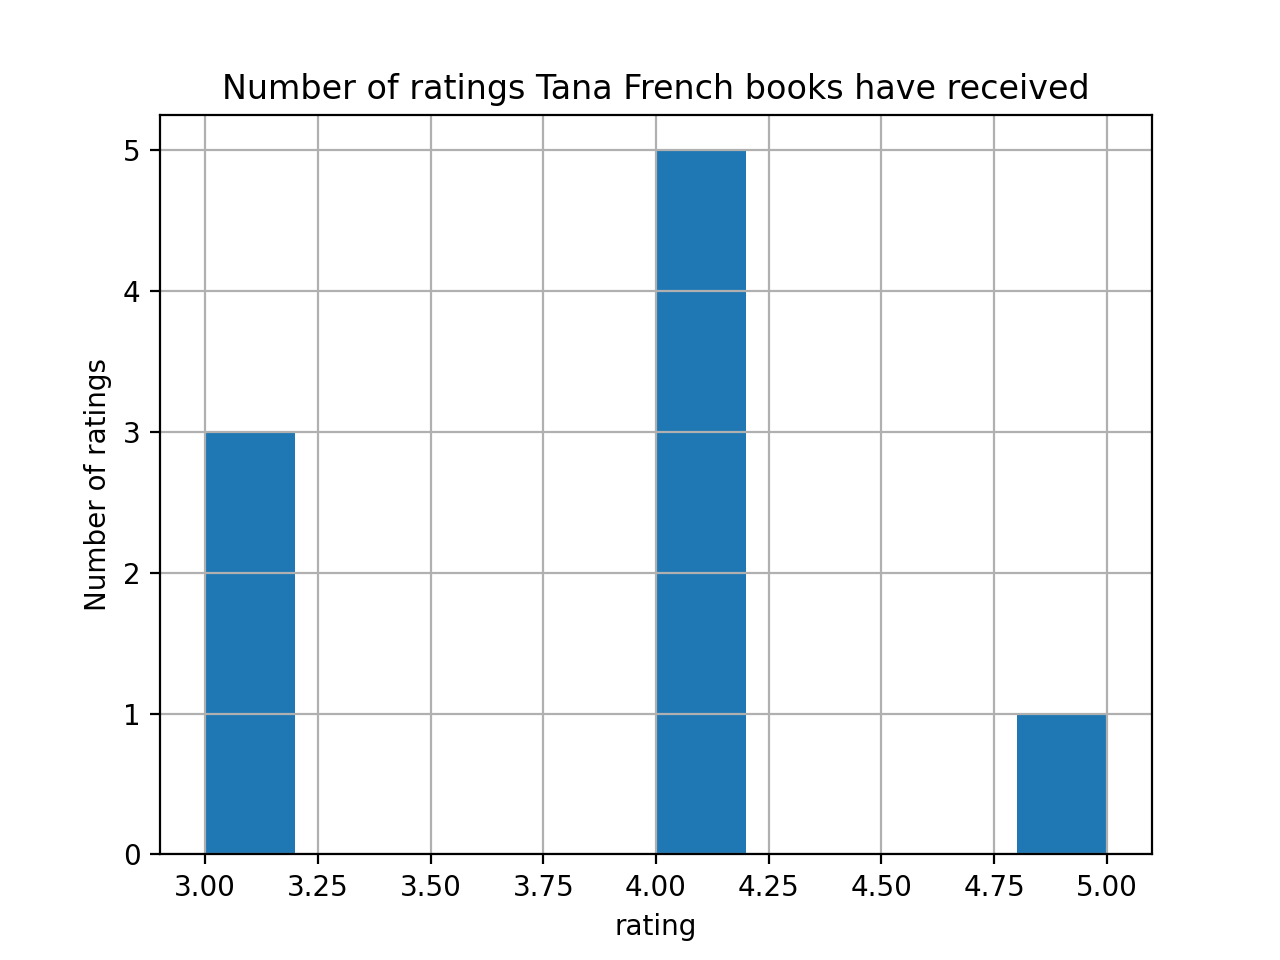

In [91]:
import matplotlib.pyplot as plt
%matplotlib notebook

df_new.loc[df_new['authors'] == 'Tana French']['rating'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings Tana French books have received')
plt.show();

In [110]:
min_book_ratings = 50
filter_books = df['book_id'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['book_id'].isin(filter_books)) & (df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(230594, 20)
The new data frame shape:	(134645, 20)


In [69]:
# trimmed df (50 = RS for most popular books, 5 = RS for backlist books)

In [111]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df_new[['user_id', 'book_id', 'rating']], reader)

In [112]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [113]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [114]:
print("+++ Algorithm results for popular books +++") 
surprise_results # lowest = KNNBaseline in trial 1, SVDpp in trial 2

+++ Algorithm results for popular books +++


,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.886305,1.091879,9.270810
SVDpp,0.887035,50.653187,2.504047
KNNWithZScore,0.894480,0.944893,9.031075
KNNWithMeans,0.895268,0.858398,8.591584
SlopeOne,0.896132,0.303886,2.092108
BaselineOnly,0.896709,0.295736,0.299480
SVD,0.899199,4.460350,0.336971
CoClustering,0.918529,2.038617,0.347805
KNNBasic,0.922158,0.817532,8.730893


In [115]:
# for KNNBaseline algo
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = KNNBaseline(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.88632542, 0.88485361, 0.88787212]),
 'fit_time': (0.9952521324157715, 1.0033199787139893, 1.021554946899414),
 'test_time': (9.80513882637024, 9.730428218841553, 10.03923773765564)}

In [116]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVDpp()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.8775


0.8774850669289784

In [117]:
trainset = algo.trainset
print(algo.__class__.__name__)

SVDpp


In [118]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [119]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,1234,179,4.0,3.122660,{'was_impossible': False},52,213,0.877340
1,3091,2043,4.0,3.981281,{'was_impossible': False},54,38,0.018719
2,5424,120,5.0,4.085751,{'was_impossible': False},42,73,0.914249
3,1476,398,3.0,3.758411,{'was_impossible': False},73,163,0.758411
4,1449,131,5.0,3.166063,{'was_impossible': False},100,321,1.833937


In [120]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [121]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
30744,2125,903,4.0,4.000020,{'was_impossible': False},88,92,0.000020
28547,859,1768,4.0,4.000147,{'was_impossible': False},50,36,0.000147
2839,516,576,4.0,4.000176,{'was_impossible': False},47,104,0.000176
14246,2108,101,4.0,4.000189,{'was_impossible': False},57,368,0.000189
20664,3297,63,3.0,3.000235,{'was_impossible': False},16,320,0.000235
16733,4348,287,4.0,4.000243,{'was_impossible': False},36,236,0.000243
16016,1581,669,4.0,3.999744,{'was_impossible': False},63,110,0.000256
21068,3784,350,4.0,3.999638,{'was_impossible': False},54,134,0.000362
23399,1565,28,4.0,4.000366,{'was_impossible': False},57,596,0.000366
25983,1962,232,5.0,4.999627,{'was_impossible': False},66,128,0.000373


In [122]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
9228,5223,480,1.0,4.523565,{'was_impossible': False},65,130,3.523565
6801,694,64,1.0,4.527926,{'was_impossible': False},45,172,3.527926
26137,3183,26,1.0,4.545892,{'was_impossible': False},41,767,3.545892
9616,1962,5,1.0,4.547231,{'was_impossible': False},66,679,3.547231
27844,4057,37,1.0,4.559286,{'was_impossible': False},44,327,3.559286
14676,709,663,1.0,4.590746,{'was_impossible': False},48,67,3.590746
17103,1102,94,1.0,4.613920,{'was_impossible': False},39,327,3.613920
32392,709,161,1.0,4.657130,{'was_impossible': False},48,305,3.657130
9627,4653,7,1.0,4.680480,{'was_impossible': False},61,562,3.680480
31052,495,297,1.0,4.762133,{'was_impossible': False},50,208,3.762133


In [125]:
df_new.loc[df_new['authors'] == 'Stephenie Meyer']['rating'].describe()

count    396.000000
mean       3.959596
std        1.080733
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

<IPython.core.display.Javascript object>


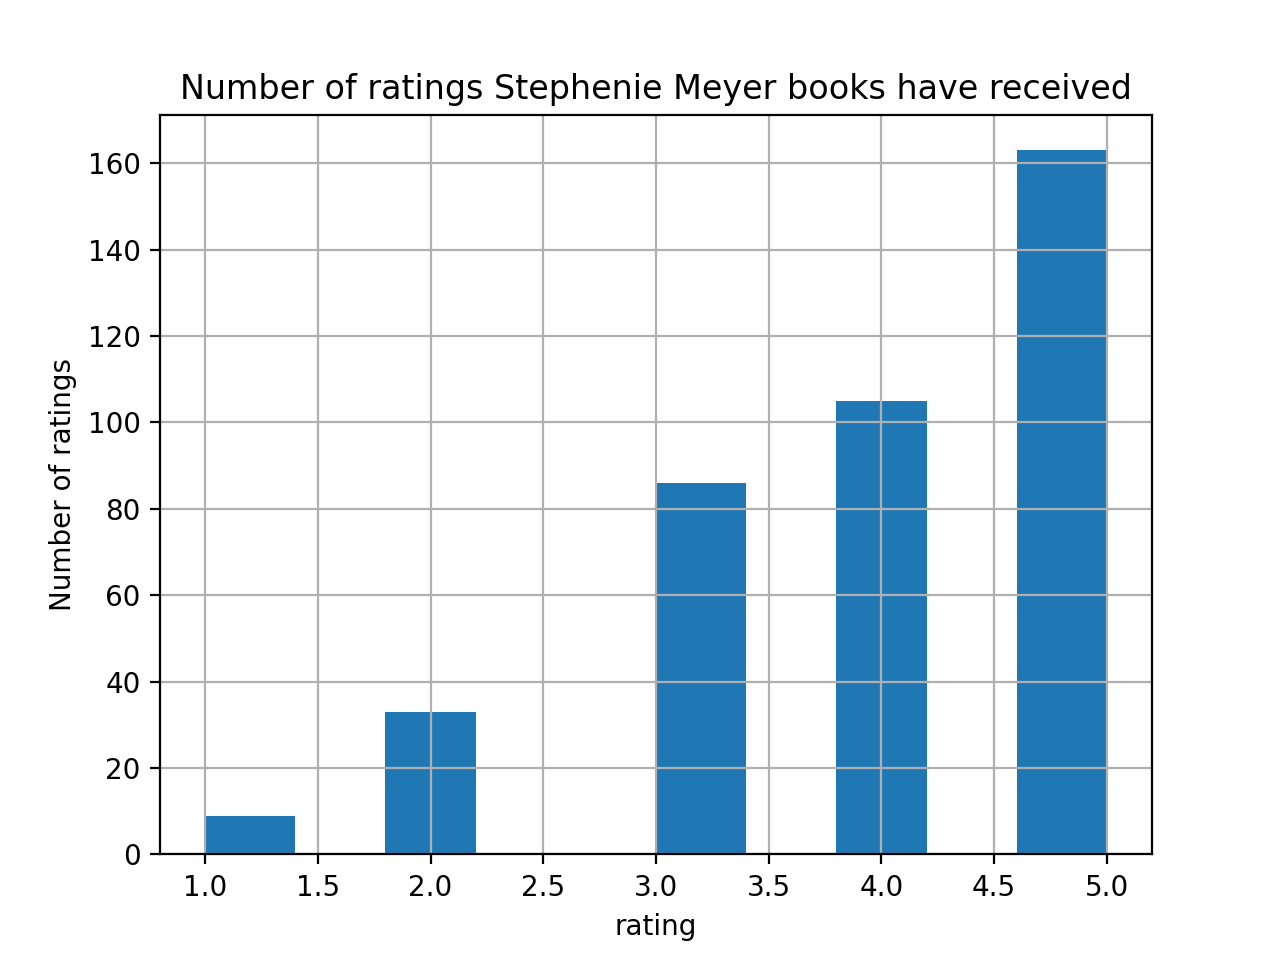

In [126]:
import matplotlib.pyplot as plt
%matplotlib notebook

df_new.loc[df_new['authors'] == 'Stephenie Meyer']['rating'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings Stephenie Meyer books have received')
plt.show();